## 2 Random network model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import networkx as nx
import osmnx as ox
import seaborn as sns
from itertools import product, combinations
import pickle as pkl
from randomnetworkmodel import *
from street_network_from_json import *
import pandas as pd


In [2]:
fig_width_pt = 455.24411  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
params = {'axes.labelsize': 10,
           'font.size': 10,
           'legend.fontsize': 10,
           'xtick.labelsize': 8,
           'ytick.labelsize': 8,
           'text.usetex': False,
           'figure.figsize': fig_size}
plt.rcParams.update(params)

In [3]:
import math


def round_decimals_up(number:float, decimals:int=2):
    """
    Returns a value rounded up to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.ceil(number * factor) / factor


def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

In [4]:
cs = 3, 5, 7
ns = 20, 50, 100
rs = .3, .8
reps = 1

In [5]:
# paramscan = [{'C': c, 'n': n, 'r': r, 'rep': i, 'G': get_randomnetwork(n, c, r)} for c, n, r, i in
#              product(cs, ns, rs, range(reps))]

# Gdf = pd.DataFrame(paramscan)
# Gdf.G.apply(set_edge_att)

In [6]:
Gdf = pd.read_pickle('randomnws.pkl')

## Visualizations of graphs with edges colored by betweenness centrality

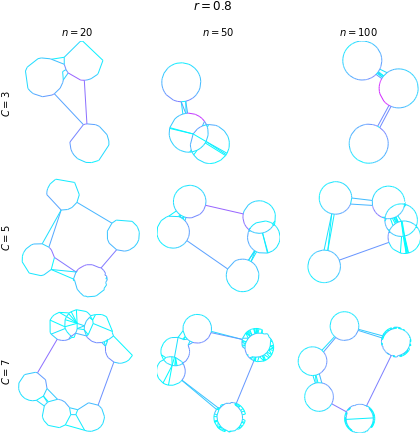

In [11]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=False, sharey=False, figsize=(fig_width, fig_width))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness centrality').values()
    pos = nx.get_node_attributes(G, 'pos')
    posarray = np.array(list(pos.values()))
#     ax.set_xlim(posarray[..., 0].min(), posarray[..., 0].max())
#     ax.set_ylim(posarray[..., 1].min(), posarray[..., 1].max())
    ax.set_xlim(-r-np.sqrt(c), r+np.sqrt(c))
    ax.set_ylim(-r-np.sqrt(c), r+np.sqrt(c))
    es = nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=1, edge_color=ei, edge_cmap=plt.get_cmap('cool'), edge_vmax=.5, edge_vmin=0)
#     ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_frame_on(False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.4, ticks=[round_decimals_up(min(ei)), round_decimals_down(max(ei), 2)], drawedges=False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.5, format='%.2f')

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()
# plt.savefig('modelvisr08.svg')

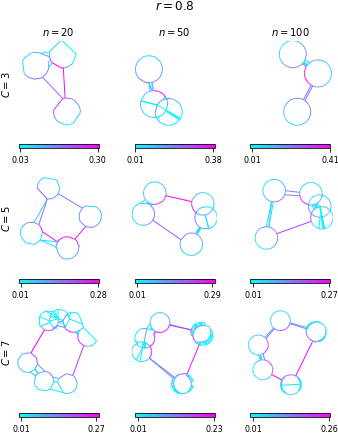

In [9]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=False, sharey=False, figsize=(fig_width, fig_width))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness centrality').values()
    pos = nx.get_node_attributes(G, 'pos')
    posarray = np.array(list(pos.values()))
#     ax.set_xlim(posarray[..., 0].min(), posarray[..., 0].max())
#     ax.set_ylim(posarray[..., 1].min(), posarray[..., 1].max())
    ax.set_xlim(-r-np.sqrt(c), r+np.sqrt(c))
    ax.set_ylim(-r-np.sqrt(c), r+np.sqrt(c))
    es = nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=1, edge_color=ei, edge_cmap=plt.get_cmap('cool'))
#     ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_frame_on(False)
    plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.4, ticks=[round_decimals_up(min(ei)), round_decimals_down(max(ei), 2)], drawedges=False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.5, format='%.2f')

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()
plt.draw()


## Visualization of betweenness centrality impact

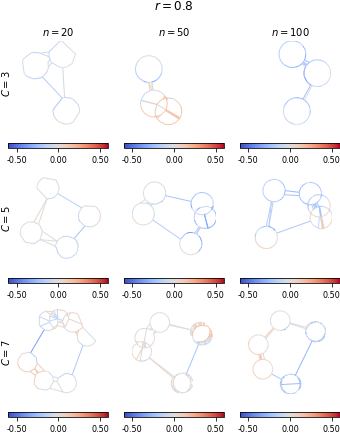

In [28]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=False, sharey=False, figsize=(fig_width, fig_width))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness impact').values()
    pos = nx.get_node_attributes(G, 'pos')
    posarray = np.array(list(pos.values()))
#     ax.set_xlim(posarray[..., 0].min(), posarray[..., 0].max())
#     ax.set_ylim(posarray[..., 1].min(), posarray[..., 1].max())
    ax.set_xlim(-r-np.sqrt(c), r+np.sqrt(c))
    ax.set_ylim(-r-np.sqrt(c), r+np.sqrt(c))
    es = nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=1, edge_color=ei, edge_cmap=plt.get_cmap('coolwarm'), edge_vmin=-0.6, edge_vmax=0.6)
#     ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_frame_on(False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.4, ticks=[round_decimals_up(min(ei)), round_decimals_down(max(ei), 2)], drawedges=False)
    plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.5, format='%.2f', ticks=[-.5, 0., 0.5])

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()
# plt.savefig('modelvisbcicbar.svg')

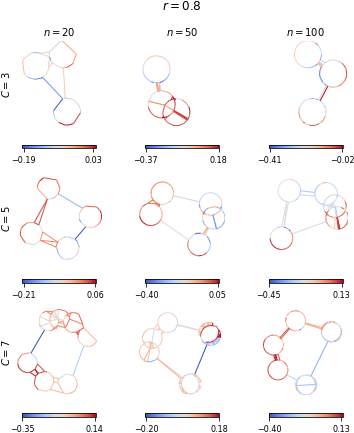

In [13]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=False, sharey=False, figsize=(fig_width, fig_width))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness impact').values()
    pos = nx.get_node_attributes(G, 'pos')
    posarray = np.array(list(pos.values()))
#     ax.set_xlim(posarray[..., 0].min(), posarray[..., 0].max())
#     ax.set_ylim(posarray[..., 1].min(), posarray[..., 1].max())
    ax.set_xlim(-r-np.sqrt(c), r+np.sqrt(c))
    ax.set_ylim(-r-np.sqrt(c), r+np.sqrt(c))
    es = nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=1, edge_color=ei, edge_cmap=plt.get_cmap('coolwarm'))
#     ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_frame_on(False)
    plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.4, ticks=[round_decimals_up(min(ei)), round_decimals_down(max(ei), 2)], drawedges=False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.5, format='%.2f')

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()

## Distance distributions

In [10]:
# Gdf['distances'] = Gdf.G.apply(distances)

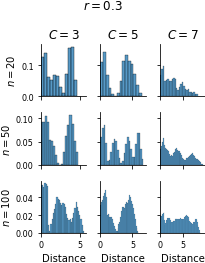

In [49]:
r = rs[0]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex='col', sharey='row', facecolor='w', figsize=(.5*fig_width, fig_height))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.T.flatten()):
    length = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'distances'].iloc[0]
    sns.histplot(length, log_scale=False, stat='probability', ax=ax, legend=False, bins='auto')
#     ax.set_yticks([0, 0.05])
    ax.set_xlabel('Distance')
    ax.set_ylabel('')
    sns.despine()
#     ax.set_xticks([0, 5])
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$C = {}$'.format(cs[i]))
    ax.set_xlim(0)

    
    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()
# plt.savefig('modeldistr03.pdf')

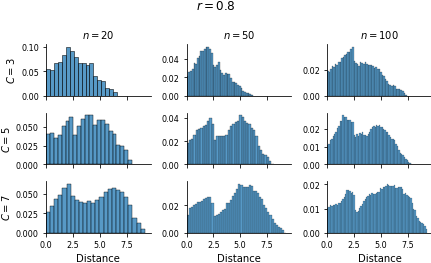

In [76]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=False, facecolor='w')
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
    length = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'distances'].iloc[0]
    sns.histplot(length, log_scale=False, stat='probability', ax=ax, legend=False, bins='auto')
#     ax.set_yticks([])
    ax.set_xlabel('Distance')
    ax.set_ylabel('')
    sns.despine()
#     ax.set_xticks([0, 5])
    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    ax.set_xlim(0)
    
plt.tight_layout()
plt.savefig('modeldistr08.pdf')

## Edge betweenness centrality

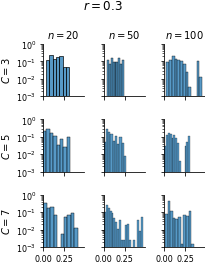

In [46]:
r = rs[0]

# ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w', figsize=(0.5 * fig_width, fig_height))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax, in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    ebc = nx.get_edge_attributes(G, 'betweenness centrality').values()
    sns.histplot(ebc, log_scale=False, stat='probability', ax=ax, legend=False, bins='auto')
    sns.despine()
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1)

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
#     ax.set_yticks([])
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    ax.set_xlim(0)
    
plt.tight_layout()
plt.savefig('modelbc.svg')

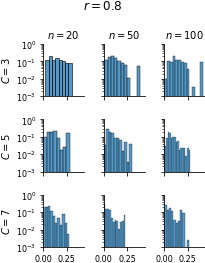

In [47]:
r = rs[1]

# ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w', figsize=(0.5 * fig_width, fig_height))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax, in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    ebc = nx.get_edge_attributes(G, 'betweenness centrality').values()
    sns.histplot(ebc, log_scale=False, stat='probability', ax=ax, legend=False, bins='auto')
    sns.despine()
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1)

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
#     ax.set_yticks([])
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    ax.set_xlim(0)
    
plt.tight_layout()
# plt.savefig('modelbc2.svg')

## Edge betweenness impact

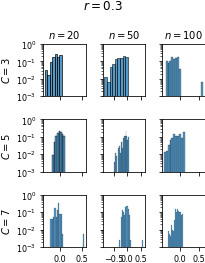

In [32]:
r = rs[0]

# ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex='col', sharey=True, facecolor='w',  figsize=(.5*fig_width, fig_height))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax, in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    ebc = nx.get_edge_attributes(G, 'betweenness impact').values()
    sns.histplot(ebc, log_scale=False, stat='probability', ax=ax, legend=False, bins='auto')
    ax.set_ylabel('')
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1)
    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
#     ax.set_yticks([])
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()
# plt.savefig('modebci08.svg')

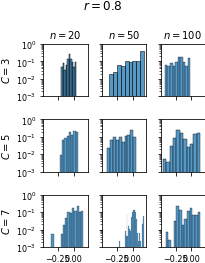

In [45]:
r = rs[1]

# ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w',  figsize=(.5*fig_width, fig_height))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax, in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    ebc = nx.get_edge_attributes(G, 'betweenness impact').values()
    sns.histplot(ebc, log_scale=False, stat='probability', ax=ax, legend=False, bins='auto')
    ax.set_ylabel('')
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1)
    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
#     ax.set_yticks([])
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()

## Betweenness impact visualization

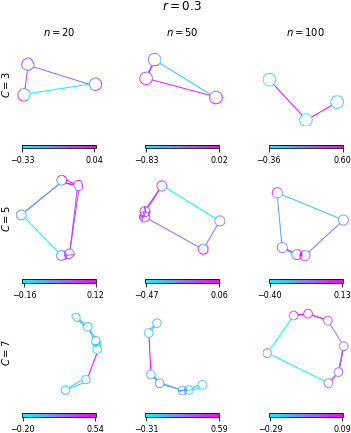

In [25]:
r = rs[0]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=False, sharey=False, figsize=(fig_width, fig_width))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness impact').values()
    pos = nx.get_node_attributes(G, 'pos')
    posarray = np.array(list(pos.values()))
#     ax.set_xlim(posarray[..., 0].min(), posarray[..., 0].max())
#     ax.set_ylim(posarray[..., 1].min(), posarray[..., 1].max())
    ax.set_xlim(-r-np.sqrt(c), r+np.sqrt(c))
    ax.set_ylim(-r-np.sqrt(c), r+np.sqrt(c))
    es = nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=1, edge_color=ei, edge_cmap=plt.get_cmap('cool'))
#     ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_frame_on(False)
    plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.4, ticks=[round_decimals_up(min(ei)), round_decimals_down(max(ei), 2)], drawedges=False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.5, format='%.2f')

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()

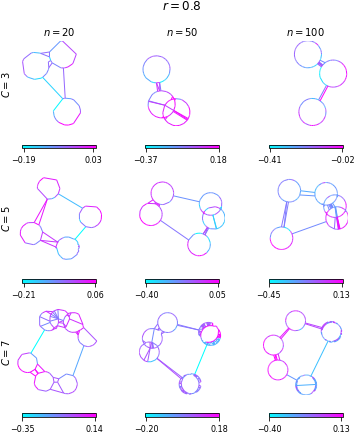

In [26]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=False, sharey=False, figsize=(fig_width, fig_width))
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness impact').values()
    pos = nx.get_node_attributes(G, 'pos')
    posarray = np.array(list(pos.values()))
#     ax.set_xlim(posarray[..., 0].min(), posarray[..., 0].max())
#     ax.set_ylim(posarray[..., 1].min(), posarray[..., 1].max())
    ax.set_xlim(-r-np.sqrt(c), r+np.sqrt(c))
    ax.set_ylim(-r-np.sqrt(c), r+np.sqrt(c))
    es = nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=1, edge_color=ei, edge_cmap=plt.get_cmap('cool'))
#     ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_frame_on(False)
    plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.4, ticks=[round_decimals_up(min(ei)), round_decimals_down(max(ei), 2)], drawedges=False)
#     plt.colorbar(es, ax=ax,  label='', orientation='horizontal', shrink=.5, format='%.2f')

    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()

In [150]:
# Gdf.to_pickle('randomnws.pkl')

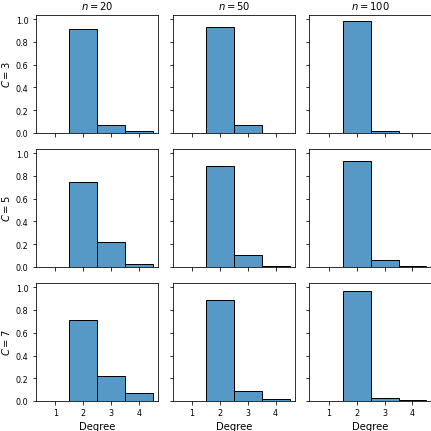

In [14]:
r = rs[0]

# ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex='col', sharey=True, facecolor='w',  figsize=(fig_width, fig_width))
# plt.suptitle('Edge betweenness impact $r = {}$'.format(r))
for (c, n), ax, in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    bc = [d for _, d in G.degree()]
#     ebc = nx.get_edge_attributes(G, 'betweenness impact').values()
    sns.histplot(bc, log_scale=False, stat='probability', ax=ax, legend=False,  bins=np.arange(1, 6)-.5)
    ax.set_ylabel('')
    ax.set_xlabel('Degree')
    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
#     ax.set_yticks([])
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
    
plt.tight_layout()

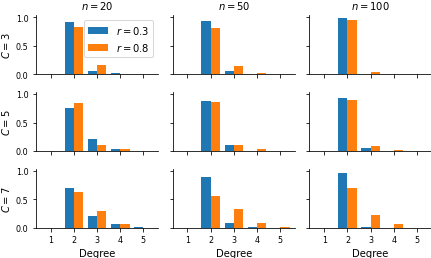

In [88]:
# r = rs[1]

# ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
# plt.suptitle('Edge betweenness impact $r = {}$'.format(r))
for (c, n), ax, in zip(product(cs, ns), axs.flatten()):
#     ax.set_title('$C = {}$, $n = {}$'.format(c, n))
#     G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    Gs = Gdf.loc[(Gdf.n==n) & (Gdf.C==c), 'G']

    bc = [[d for _, d in G.degree()] for G in Gs]
#     ebc = nx.get_edge_attributes(G, 'betweenness impact').values()
#     sns.histplot(bc, log_scale=False, stat='probability', ax=ax, legend=False,  bins=np.arange(1, 6)-.5)
    ax.hist(bc, density=True, bins=np.arange(1, 7)-.5, label=['$r = {:.1f}$'.format(r) for r in rs])

    ax.set_ylabel('')
    sns.despine()
#     ax.set_yscale('log')
#     ax.set_xticks(range(9))
#     ax.set_xlabel('Degree')
    
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel('$C = {}$'.format(cs[i]))
#     ax.set_yticks([0, .5, 1])
#     ax.set_yticks([])
    
    
for i, ax in enumerate(axs[0]):
    ax.set_title('$n = {}$'.format(ns[i]), size=10)
#     ax.set_xlabel('Degree')

for i, ax in enumerate(axs[-1]):
    ax.set_xlabel('Degree')
    ax.set_xticks(range(1,6))

plt.tight_layout()
axs[0, 0].legend()
plt.savefig('modeldegree.pdf')